## Generate data

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

from copy import copy
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

In [2]:
n = 500
means = [[1, 1], [4, 4]]
X, y = make_blobs(n_samples=n, 
                  centers=means,
                  random_state=888)

In [3]:
precision = 0.1
x_1, x_2 = np.mgrid[-2:8:precision, -2:8:precision]
grid = np.column_stack((x_1.ravel(), x_2.ravel()))

## Fit models

In [36]:
tree = DecisionTreeClassifier()
tree.fit(X, y)
tree_probs = tree.predict(grid).reshape(x_1.shape)

In [81]:
bagged_trees_3 = BaggingClassifier(DecisionTreeClassifier(max_depth=3), 3)
bagged_trees_3.fit(X, y)
bagged_probs_3 = bagged_trees_3.predict(grid).reshape(x_1.shape)

In [33]:
bagged_trees_10 = BaggingClassifier(DecisionTreeClassifier(), 1000)
bagged_trees_10.fit(X, y)
bagged_probs_10 = bagged_trees_10.predict(grid).reshape(x_1.shape)

In [28]:
random_forest = RandomForestClassifier(1000, max_depth=3)
random_forest.fit(X, y)
rf_probs = random_forest.predict(grid).reshape(x_1.shape)

In [34]:
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                              n_estimators=1000)
adaboost.fit(X, y)
adaboost_preds = adaboost.predict(grid).reshape(x_1.shape)

## Visualisation of Bagging

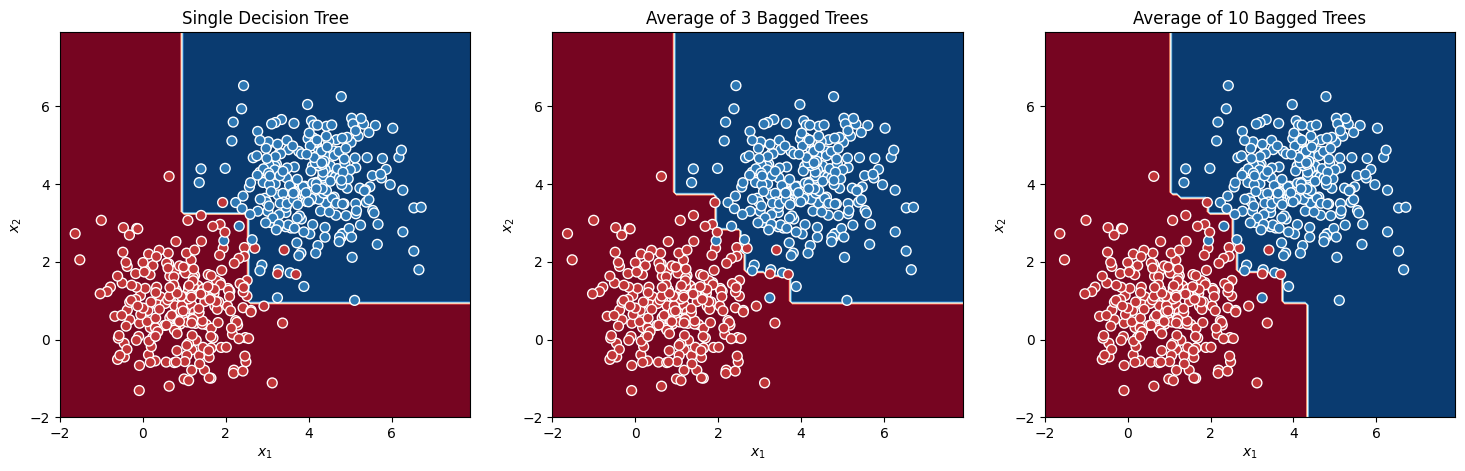

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.set_title('Single Decision Tree')
contour_2 = ax1.contourf(x_1, x_2, tree_probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax1.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax1.set(xlabel="$x_1$", ylabel="$x_2$")

ax2.set_title('Average of 3 Bagged Trees')
contour_2 = ax2.contourf(x_1, x_2, bagged_probs_3, 25, cmap="RdBu", vmin=0, vmax=1)
ax2.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax2.set(xlabel="$x_1$", ylabel="$x_2$")

ax3.set_title('Average of 10 Bagged Trees')
contour_2 = ax3.contourf(x_1, x_2, bagged_probs_10, 25, cmap="RdBu", vmin=0, vmax=1)
ax3.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax3.set(xlabel="$x_1$", ylabel="$x_2$")

plt.show()

## Visualisation of bagging in the case of overfitting

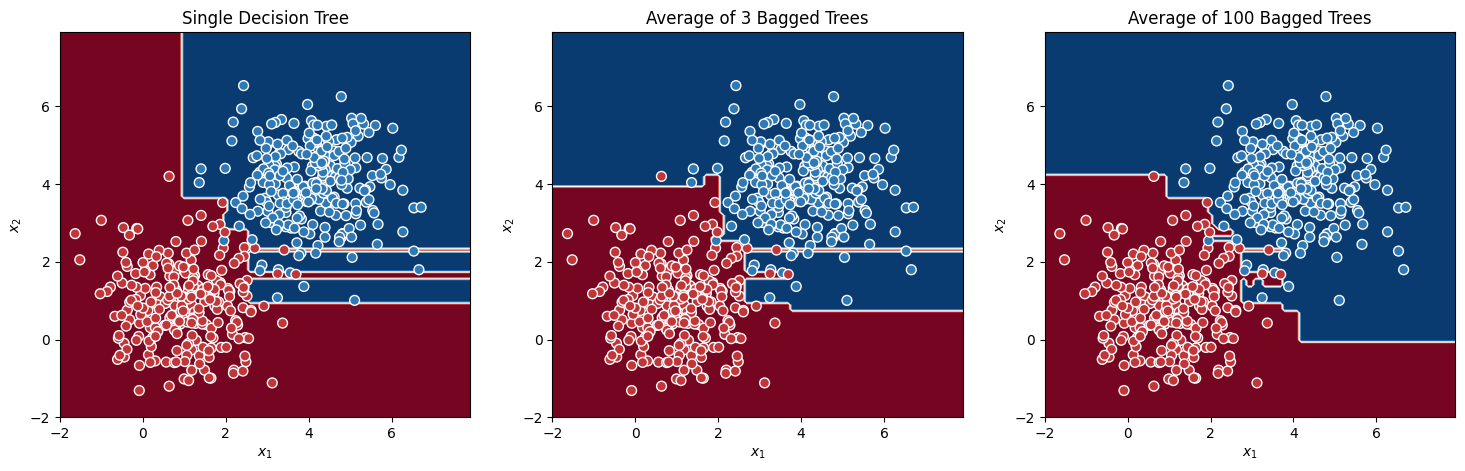

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.set_title('Single Decision Tree')
contour_2 = ax1.contourf(x_1, x_2, tree_probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax1.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax1.set(xlabel="$x_1$", ylabel="$x_2$")

ax2.set_title('Average of 3 Bagged Trees')
contour_2 = ax2.contourf(x_1, x_2, bagged_probs_3, 25, cmap="RdBu", vmin=0, vmax=1)
ax2.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax2.set(xlabel="$x_1$", ylabel="$x_2$")

ax3.set_title('Average of 100 Bagged Trees')
contour_2 = ax3.contourf(x_1, x_2, bagged_probs_10, 25, cmap="RdBu", vmin=0, vmax=1)
ax3.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax3.set(xlabel="$x_1$", ylabel="$x_2$")

plt.show()

## Visualisation of Bagging and Random Forest

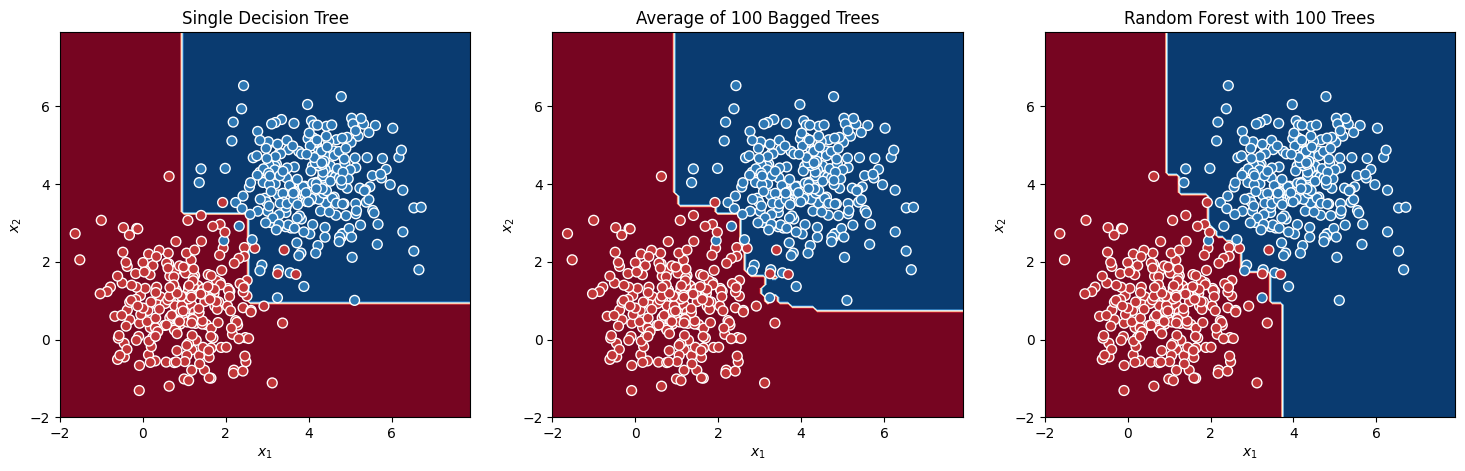

In [79]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.set_title('Single Decision Tree')
contour_2 = ax1.contourf(x_1, x_2, tree_probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax1.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax1.set(xlabel="$x_1$", ylabel="$x_2$")

ax2.set_title('Average of 100 Bagged Trees')
contour_2 = ax2.contourf(x_1, x_2, bagged_probs_10, 25, cmap="RdBu", vmin=0, vmax=1)
ax2.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax2.set(xlabel="$x_1$", ylabel="$x_2$")

ax3.set_title('Random Forest with 100 Trees')
contour_2 = ax3.contourf(x_1, x_2, rf_probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax3.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax3.set(xlabel="$x_1$", ylabel="$x_2$")

plt.show()

## Visualisation of Bagging and Adaboost

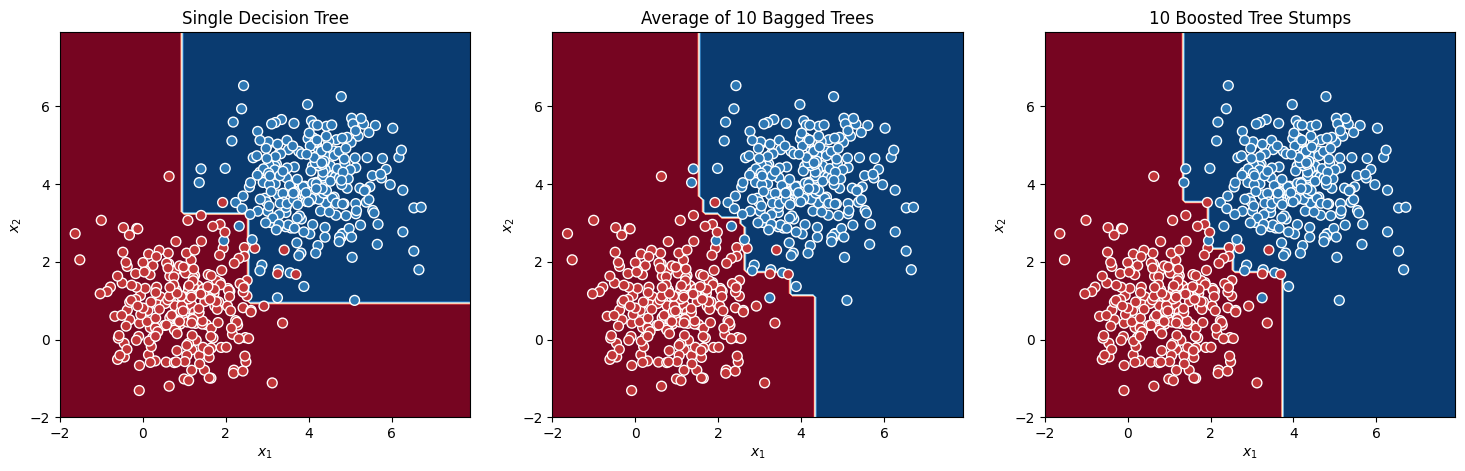

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.set_title('Single Decision Tree')
contour_2 = ax1.contourf(x_1, x_2, tree_probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax1.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax1.set(xlabel="$x_1$", ylabel="$x_2$")

ax2.set_title('Average of 10 Bagged Trees')
contour_2 = ax2.contourf(x_1, x_2, bagged_probs_10, 25, cmap="RdBu", vmin=0, vmax=1)
ax2.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax2.set(xlabel="$x_1$", ylabel="$x_2$")

ax3.set_title('10 Boosted Tree Stumps')
contour_2 = ax3.contourf(x_1, x_2, adaboost_preds, 25, cmap="RdBu", vmin=0, vmax=1)
ax3.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax3.set(xlabel="$x_1$", ylabel="$x_2$")

plt.show()

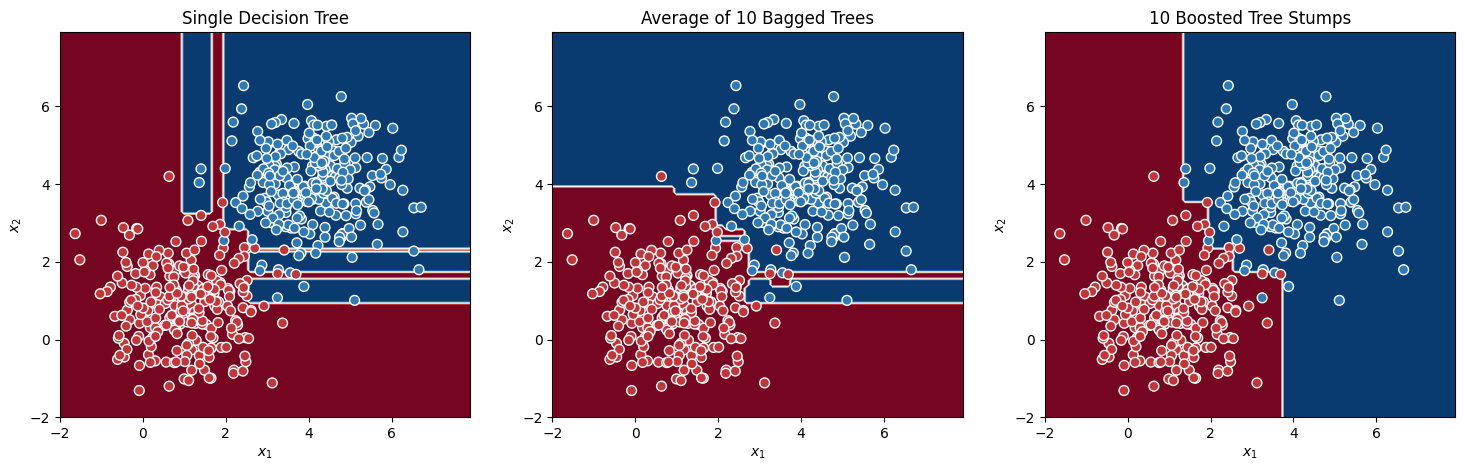

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.set_title('Single Decision Tree')
contour_2 = ax1.contourf(x_1, x_2, tree_probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax1.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax1.set(xlabel="$x_1$", ylabel="$x_2$")

ax2.set_title('Average of 10 Bagged Trees')
contour_2 = ax2.contourf(x_1, x_2, bagged_probs_10, 25, cmap="RdBu", vmin=0, vmax=1)
ax2.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax2.set(xlabel="$x_1$", ylabel="$x_2$")

ax3.set_title('10 Boosted Tree Stumps')
contour_2 = ax3.contourf(x_1, x_2, adaboost_preds, 25, cmap="RdBu", vmin=0, vmax=1)
ax3.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax3.set(xlabel="$x_1$", ylabel="$x_2$")

plt.show()

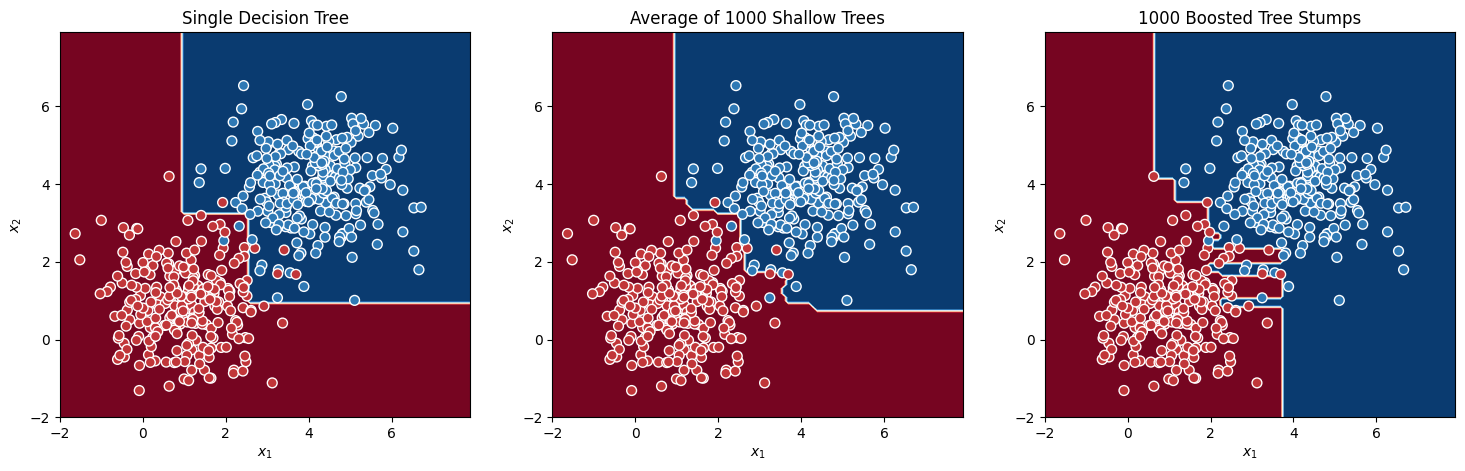

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.set_title('Single Decision Tree')
contour_2 = ax1.contourf(x_1, x_2, tree_probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax1.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax1.set(xlabel="$x_1$", ylabel="$x_2$")

ax2.set_title('Average of 1000 Shallow Trees')
contour_2 = ax2.contourf(x_1, x_2, bagged_probs_10, 25, cmap="RdBu", vmin=0, vmax=1)
ax2.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax2.set(xlabel="$x_1$", ylabel="$x_2$")

ax3.set_title('1000 Boosted Tree Stumps')
contour_2 = ax3.contourf(x_1, x_2, adaboost_preds, 25, cmap="RdBu", vmin=0, vmax=1)
ax3.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax3.set(xlabel="$x_1$", ylabel="$x_2$")

plt.show()

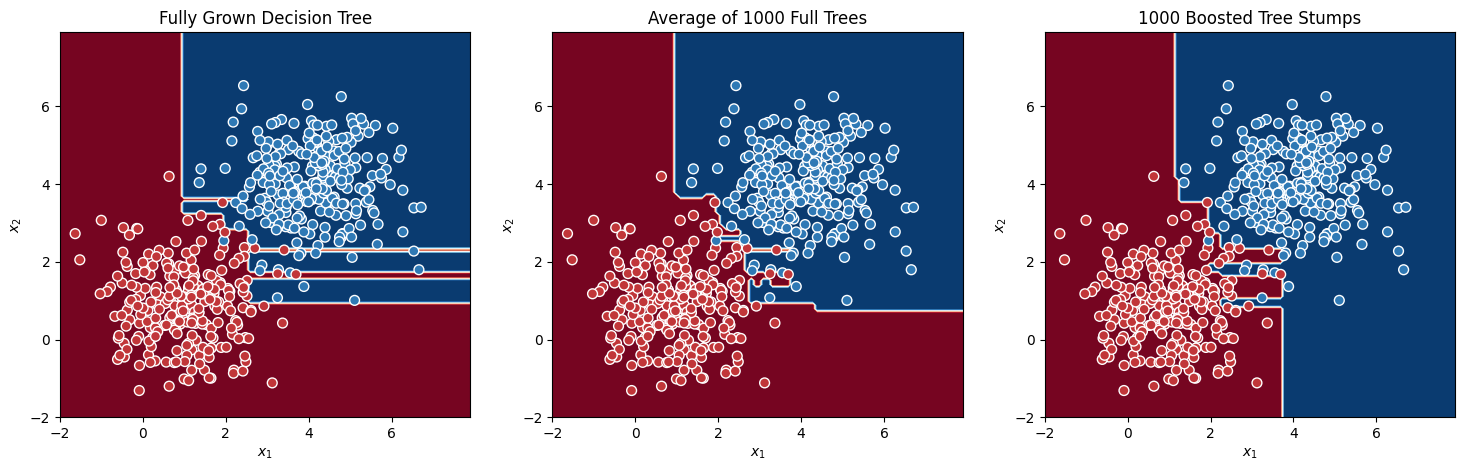

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.set_title('Fully Grown Decision Tree')
contour_2 = ax1.contourf(x_1, x_2, tree_probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax1.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax1.set(xlabel="$x_1$", ylabel="$x_2$")

ax2.set_title('Average of 1000 Full Trees')
contour_2 = ax2.contourf(x_1, x_2, bagged_probs_10, 25, cmap="RdBu", vmin=0, vmax=1)
ax2.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax2.set(xlabel="$x_1$", ylabel="$x_2$")

ax3.set_title('1000 Boosted Tree Stumps')
contour_2 = ax3.contourf(x_1, x_2, adaboost_preds, 25, cmap="RdBu", vmin=0, vmax=1)
ax3.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax3.set(xlabel="$x_1$", ylabel="$x_2$")

plt.show()

## Animation of Bagging vs Adaboost

In [47]:
!mkdir tmp

filenames = []

for i in (1, 10, 100, 1000, 10000):
    
    # train bagged tree classifier with i trees
    bagged_trees = BaggingClassifier(DecisionTreeClassifier(), i)
    bagged_trees.fit(X, y)
    bagged_probs = bagged_trees.predict(grid).reshape(x_1.shape)
    
    # train adaboost classifier with i trees
    adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                  n_estimators=i)
    adaboost.fit(X, y)
    adaboost_preds = adaboost.predict(grid).reshape(x_1.shape)
    
    # plot classifier decision boundaries
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

    ax1.set_title(f'Average of {i} Full Trees')
    contour_2 = ax1.contourf(x_1, x_2, bagged_probs, 25, cmap="RdBu", vmin=0, vmax=1)
    ax1.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
    ax1.set(xlabel="$x_1$", ylabel="$x_2$")

    ax2.set_title(f'{i} Boosted Tree Stumps')
    contour_2 = ax2.contourf(x_1, x_2, adaboost_preds, 25, cmap="RdBu", vmin=0, vmax=1)
    ax2.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
    ax2.set(xlabel="$x_1$", ylabel="$x_2$")
    
    # Save as png
    filename='tmp/comparison_'+str(i)+'.png'
    filenames.append(filename)
    plt.savefig(filename, dpi=150)
    plt.close()

# Create gif from pngs
images = []

for filename in filenames:
    images.append(imageio.imread(filename))
    
imageio.mimsave('bagging_adaboost_comp.gif', images, fps=0.3)

# Remove png files
!rm -r tmp

![](bagging_adaboost_comp.gif)

## Compare with our algorithm

In [7]:
def adaboost(X_train, y_train, X_test, model, iters):

    # initialise
    stumps = []
    stump_weights = []
    
    # encode target variable to {-1, 1}
    y_train_enc = y_train * 2 - 1
    
    # start with uniform weights for training samples
    n = X_train.shape[0]
    sample_weights = np.ones(n) / n 

    # training loop
    for t in range(iters):

        # decision stump (our weak learner)
        decision_stump_t = copy(model)
        decision_stump_t.fit(X_train, y_train_enc, sample_weight=sample_weights)
        prediction_t = decision_stump_t.predict(X_train)

        # calculate error rate
        error_rate = sample_weights[(prediction_t != y_train_enc)].sum()

        # calculate stump weight
        stump_weight = np.log((1 - error_rate) / error_rate) / 2

        # update weights
        sample_weights *= np.exp(-stump_weight * y_train_enc * prediction_t)
        sample_weights /= sample_weights.sum()

        # save results of iteration
        stumps.append(decision_stump_t)
        stump_weights.append(stump_weight)

    # get stump predictions
    stump_preds = np.array([stump.predict(X_test) for stump in stumps])
    
    return np.sign(np.dot(stump_weights, stump_preds))

In [11]:
adaboost_preds = adaboost(X, y, grid, DecisionTreeClassifier(max_depth=1), 10).reshape(x_1.shape)

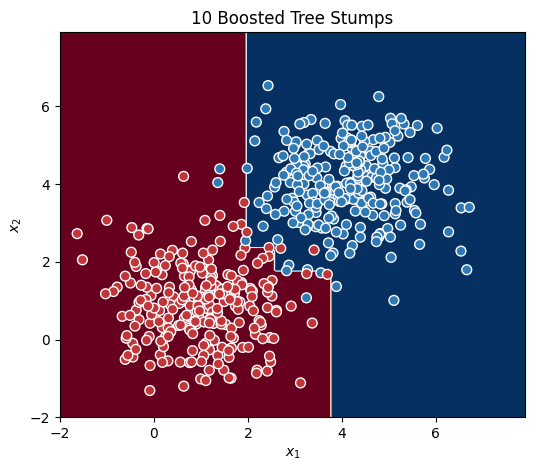

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.set_title('10 Boosted Tree Stumps')
contour_2 = ax.contourf(x_1, x_2, adaboost_preds, 25, cmap="RdBu", vmin=0, vmax=1)
ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(xlabel="$x_1$", ylabel="$x_2$")

plt.show()

## Other snippets

In [ ]:
def adaboost(X_train, y_train, X_test, model, iters):

    # initialise
    stumps = []
    stump_weights = []

    # start with uniform weights for training samples
    n = X_train.shape[0]
    sample_weights = np.ones(n) / n 

    # training loop
    for t in tqdm(range(iters)):

        # decision stump (our weak learner)
        decision_stump_t = copy.copy(model)
        decision_stump_t.fit(X_train, y_train, sample_weight=sample_weights)
        prediction_t = decision_stump_t.predict(X_train)

        # calculate error rate
        error_rate = sample_weights[(prediction_t != y_train)].sum()

        # calculate stump weight
        stump_weight = np.log((1 - error_rate) / error_rate) / 2
        
        # get indices of correct predictions
        correct_idx = [i for i, x in enumerate(prediction_t==y_train) if x]

        # update weights
        sample_weights *= np.array([np.exp(-stump_weight) if i==j else np.exp(stump_weight) for (i, j) in zip(prediction_t, y_train)])
        sample_weights /= sample_weights.sum()

        # save results of iteration
        stumps.append(decision_stump_t)
        stump_weights.append(stump_weight)

    # get stump predictions
    stump_preds = np.array([stump.predict(X_test) for stump in stumps])

    ensemble_preds = []

    for k in range(len(X_test)):
        
        idx_positive = [i for i, x in enumerate(stump_preds[:,k]) if x]
        idx_negative = [i for i, x in enumerate(stump_preds[:,k]) if not x]
        
        sum_positive = np.sum([stump_weights[i] for i in idx_positive])
        sum_negative = np.sum([stump_weights[i] for i in idx_negative])
        
        if sum_positive > sum_negative:
            ensemble_preds.append(1)
        else:
            ensemble_preds.append(0)

    return ensemble_preds